#### Question 1: What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

Answer ->

Deep Learning is a subset of machine learning that utilizes artificial neural networks with multiple layers (hence "deep") to model complex patterns in data. Inspired by the structure and function of the human brain, deep learning algorithms attempt to draw conclusions and make decisions by analyzing large amounts of data.

Evolution:

1940s-60s (The Cybernetics Era): It began with the modeling of biological neurons. The Perceptron (1958) was the first trainable neural network, though it was limited to linear problems.

1980s-90s (Connectionism): The introduction of Backpropagation allowed for training multi-layer networks, solving the non-linearity issue. However, computational power was lacking.

2006-Present (Deep Learning): With the advent of Big Data, powerful GPUs, and improved algorithms (like ReLU activation), deep neural networks became practical. This led to breakthroughs in computer vision (AlexNet, 2012) and NLP (Transformers).

Difference from Traditional Machine Learning:

Feature Extraction: In traditional ML, domain experts must manually hand-craft features from the data (feature engineering). In Deep Learning, the network automatically learns feature representations from raw data (e.g., pixel values to edges to shapes).

Data Dependency: Deep learning typically requires massive amounts of labeled data to perform well, whereas traditional ML (like Decision Trees or SVMs) can perform better on smaller datasets.

Hardware: Deep learning relies heavily on high-end GPUs for matrix operations; traditional ML can often run on standard CPUs.

#### Question 2: Explain the basic architecture and functioning of a Perceptron. What are its limitations?

Answer ->
Architecture:A Perceptron is the fundamental building block of a neural network—a single artificial neuron. Its architecture consists of:

Input Layer ($x$): Receives input signals/features.

Weights ($w$): Represents the strength or importance of the respective input.

Bias ($b$): An additional parameter that allows the decision boundary to shift away from the origin.

Net Input Function: Calculates the weighted sum of inputs and bias: 
$z = \sum (w_i \cdot x_i) + b$. 

Activation Function: Applies a threshold (usually a Step function in the original perceptron) to the net input to determine the output (0 or 1).

Functioning:The perceptron takes the weighted sum of inputs.If this sum exceeds a certain threshold, the neuron "fires" (outputs 1); otherwise, it stays inactive (outputs 0). 

Mathematically:

$$y = \begin{cases} 1 & \text{if } w \cdot x + b > 0 \\ 0 & \text{otherwise} \end{cases}$$

Limitations:The primary limitation of a single-layer Perceptron is that it can only classify linearly separable data.It cannot solve problems where the classes cannot be separated by a straight line, such as the XOR problem (Exclusive OR).

#### Question 3: Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

Answer ->

Purpose: The activation function introduces non-linearity into the neural network. Without activation functions, a neural network (no matter how many layers it has) would behave like a single linear regression model, unable to learn complex patterns like curves or image features.

FeatureSigmoidTanh (Hyperbolic Tangent)ReLU (Rectified Linear Unit)Range$(0, 1)$$(-1, 1)$$[0, \infty)$Formula$\sigma(x) = \frac{1}{1+e^{-x}}$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$f(x) = \max(0, x)$ProsGood for binary classification output layers (probability).Zero-centered (outputs average to 0), stronger gradients than Sigmoid.Computationally efficient; avoids vanishing gradient problem for positive values.ConsSuffers from the Vanishing Gradient problem; not zero-centered.Still suffers from vanishing gradients at extremes.Dying ReLU problem (neurons can get stuck outputting 0).20

#### Question 4: What is the difference between Loss function and Cost function in neural networks? Provide examples.

Answer ->

While often used interchangeably, there is a subtle difference:

Loss Function: Calculates the error for a single training example. It measures how far the predicted output ($y_{pred}$) is from the actual target ($y_{true}$) for one data point.
Example: Squared Error: $L = (y_{true} - y_{pred})^2$ 

Cost Function: The average of the Loss Functions over the entire training dataset (or a batch). It represents the global error that the optimizer tries to minimize.
Example: Mean Squared Error (MSE): $J = \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - \hat{y}^{(i)})^2$

Common Examples:

Regression: Mean Squared Error (MSE), Mean Absolute Error (MAE).

Binary Classification: Binary Cross-Entropy (Log Loss).

Multi-class Classification: Categorical Cross-Entropy.

#### Question 5: What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

Answer ->

Role: Optimizers are algorithms or methods used to change the attributes of the neural network, such as weights and learning rate, to reduce the losses. They decide "how" the network should learn by guiding the update process to reach the global minimum of the cost function efficiently.

Comparison:

Gradient Descent (GD):

The most basic optimizer. It updates weights by moving in the opposite direction of the gradient.

Drawback: Can be slow and get stuck in local minima. If the Learning Rate is too high, it overshoots; if too low, it converges strictly slowly.

RMSprop (Root Mean Square Propagation):

An adaptive learning rate method. It divides the learning rate by an exponentially decaying average of squared gradients.

Benefit: It adapts the learning rate for each parameter, performing well on non-stationary objectives and Recurrent Neural Networks (RNNs).

Adam (Adaptive Moment Estimation):

Combines the best properties of RMSprop and Momentum. It keeps track of both the decaying average of past gradients (Momentum) and the squared gradients (RMSprop).

Benefit: widely considered the best default optimizer because it is fast, requires little tuning, and handles sparse gradients well.

#### Question 6: Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


class Perceptron:
    def __init__(self,input_size,learning_rate = 0.1,epochs = 10):
        self.weights = np.zeros(input_size + 1) # +1 for bias 
        self.lr = learning_rate
        self.epochs = epochs
        
    def activation(self,x):
        # Step function 
        return 1 if x>= 0 else 0  
    
    def predict(self,x):
        z = np.dot(x,self.weights[1:])+ self.weights[0]
        return self.activation(z)  
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            print(f"Epoch {epoch+1}")
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                update = self.lr * (target - prediction)
                self.weights[1:] += update * xi
                self.weights[0] += update
                print(f"  Input: {xi}, Target: {target}, Pred: {prediction}, Updated Weights: {self.weights}")
                
                
# AND Gate Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Initialize and Train
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)

# Final Testing
print("\nFinal Predictions for AND Gate:")
for xi in X:
    print(f"{xi} -> {perceptron.predict(xi)}")

Epoch 1
  Input: [0 0], Target: 0, Pred: 1, Updated Weights: [-0.1  0.   0. ]
  Input: [0 1], Target: 0, Pred: 0, Updated Weights: [-0.1  0.   0. ]
  Input: [1 0], Target: 0, Pred: 0, Updated Weights: [-0.1  0.   0. ]
  Input: [1 1], Target: 1, Pred: 0, Updated Weights: [0.  0.1 0.1]
Epoch 2
  Input: [0 0], Target: 0, Pred: 1, Updated Weights: [-0.1  0.1  0.1]
  Input: [0 1], Target: 0, Pred: 1, Updated Weights: [-0.2  0.1  0. ]
  Input: [1 0], Target: 0, Pred: 0, Updated Weights: [-0.2  0.1  0. ]
  Input: [1 1], Target: 1, Pred: 0, Updated Weights: [-0.1  0.2  0.1]
Epoch 3
  Input: [0 0], Target: 0, Pred: 0, Updated Weights: [-0.1  0.2  0.1]
  Input: [0 1], Target: 0, Pred: 1, Updated Weights: [-0.2  0.2  0. ]
  Input: [1 0], Target: 0, Pred: 1, Updated Weights: [-0.3  0.1  0. ]
  Input: [1 1], Target: 1, Pred: 0, Updated Weights: [-0.2  0.2  0.1]
Epoch 4
  Input: [0 0], Target: 0, Pred: 0, Updated Weights: [-0.2  0.2  0.1]
  Input: [0 1], Target: 0, Pred: 0, Updated Weights: [-0.2  0

#### Question 7: Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

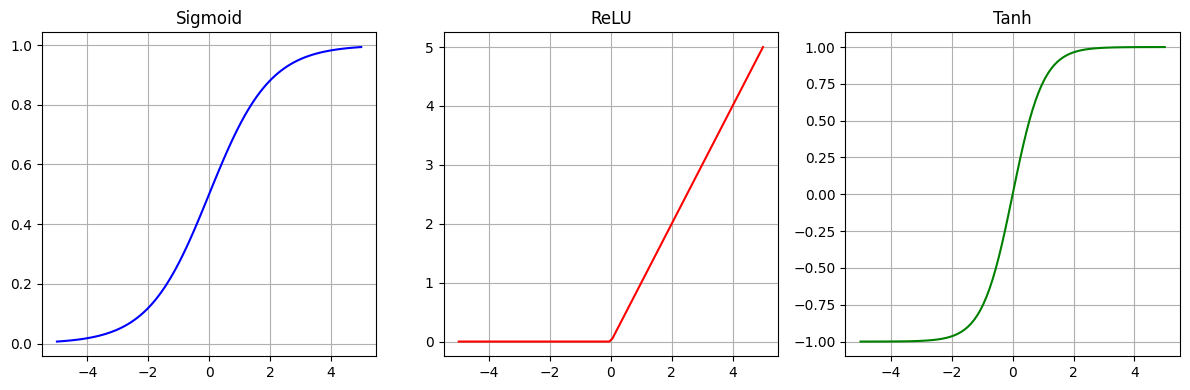

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Generate data
x = np.linspace(-5, 5, 100)

# Plotting
plt.figure(figsize=(12, 4))

# Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x), color='blue')
plt.title("Sigmoid")
plt.grid(True)

# ReLU
plt.subplot(1, 3, 2)
plt.plot(x, relu(x), color='red')
plt.title("ReLU")
plt.grid(True)

# Tanh
plt.subplot(1, 3, 3)
plt.plot(x, tanh(x), color='green')
plt.title("Tanh")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Question 8: Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# 1. Load Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Preprocess: Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# 3. Build Model
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Flatten 28x28 images to a 1D vector
    Dense(128, activation='relu'),     # Hidden layer
    Dense(10, activation='softmax')    # Output layer (10 digits)
])

# 4. Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train Model
print("Training Model...")
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

# 6. Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {accuracy*100:.2f}%")

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz: None -- [Errno 11001] getaddrinfo failed

#### Question 9: Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior.

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and capture history
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy Plot
ax[0].plot(history.history['accuracy'], label='Train Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Loss Plot
ax[1].plot(history.history['loss'], label='Train Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz: None -- [Errno 11001] getaddrinfo failed

Interpretation:

Good Fit: If the Training and Validation curves move together and plateau (level off) at a high accuracy (or low loss), the model is learning well.

Overfitting: If Training Accuracy continues to rise while Validation Accuracy flattens or drops (divergence), the model is memorizing the training data but failing to generalize.

Underfitting: If both accuracies are low and not improving, the model is too simple or needs more training time.

#### Question 10: You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features.

Workflow Explanation:

Model Design:

I would choose a Multilayer Neural Network (MLP) over a simple Perceptron because fraud patterns are complex and non-linear.

Architecture: Input layer (matching feature count) -> Multiple Hidden Dense Layers (to capture interactions between location, amount, etc.) -> Output Layer.

Imbalance Handling: Use SMOTE (Synthetic Minority Over-sampling Technique) to balance the data before training, or use Class Weights during training.

Activation & Loss Functions:

Hidden Layers: ReLU (efficient, prevents vanishing gradient).

Output Layer: Sigmoid (since this is a binary classification: Fraud vs. Legitimate, outputs probability 0-1).

Loss Function: Binary Cross-Entropy (standard for binary classification). If the imbalance is severe, I might use Focal Loss to penalize the model more for missing fraud cases.

Optimizer & Overfitting:

Optimizer: Adam (handles large datasets and sparse gradients well).

Preventing Overfitting: Implement Dropout layers (randomly turning off neurons) and Early Stopping (stop training when validation loss stops improving).

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# 1. Simulate Imbalanced Fraud Data
X, y = make_classification(n_samples=5000, n_features=20, n_classes=2, weights=[0.95, 0.05], random_state=42)
# Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Define Model for Fraud Detection
model = Sequential([
    Dense(64, activation='relu', input_shape=(20,)), # Hidden Layer 1
    Dropout(0.3),                                    # Dropout to prevent overfitting
    Dense(32, activation='relu'),                    # Hidden Layer 2
    Dropout(0.3),
    Dense(1, activation='sigmoid')                   # Output Layer (Binary)
])

# 3. Compile with Adam and Binary Crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Handle Imbalance: Calculate Class Weights (give more weight to fraud class 1)
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# 5. Train
print("Training Fraud Detection Model...")
model.fit(X_train, y_train, epochs=10, batch_size=32, class_weight=class_weight_dict, verbose=0)

# 6. Evaluate
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report (Focus on Recall for Fraud '1'):")
print(classification_report(y_test, y_pred))

c:\Users\Dell\anaconda3\envs\my_env\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Fraud Detection Model...
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report (Focus on Recall for Fraud '1'):
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       945
           1       0.23      0.80      0.36        55

    accuracy                           0.84      1000
   macro avg       0.61      0.82      0.63      1000
weighted avg       0.94      0.84      0.88      1000



Output Interpretation: The output includes a classification report. For fraud detection, we prioritize Recall for class 1 (Fraud), ensuring we catch as many fraudulent transactions as possible, even if it means flagging some legitimate ones as suspicious (Precision trade-off).